In [1]:
import pandas as pd
%pylab inline
%matplotlib inline
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import metrics

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_excel("FinalData.xlsx") #Data from World Bank

In [3]:
df.drop("PopDensityByKM", axis=1, inplace=True) #Population density is identical to infant deaths

In [4]:
row1 = df.iloc[[82, 106, 108, 223, 253]]
print(row1) #These rows only have empty variables

    Country Code  Alcohol  GovernmentExpPercent  GDPPerCapita  \
82           GIB      NaN                   NaN           NaN   
106          IMN      NaN                   NaN           NaN   
108          INX      NaN                   NaN           NaN   
223          SXM      NaN                   NaN           NaN   
253          VGB      NaN                   NaN           NaN   

     GovernmentExpOnHealthOfGovernmentTotal  HealthPerCapita  \
82                                      NaN              NaN   
106                                     NaN              NaN   
108                                     NaN              NaN   
223                                     NaN              NaN   
253                                     NaN              NaN   

     InfantDeathPer1000  BMI1  DevelopedOrNot  LifeExpextancy  
82                  NaN   NaN               0             NaN  
106                 NaN   NaN               0             NaN  
108                 NaN   NaN   

In [5]:
df = df.drop([36, 82, 106, 108, 223, 253], axis=0) 
#Also deleting China (number 36), because there are no conclusions to be made on what to fill the empty values with

In [6]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None) 
#You can now run the df.head cell to check that all the empty rows got eliminated.

In [7]:
df.reset_index(drop=True, inplace=True) #Reset the enumeration

In [8]:
df.head(300)

,Country Code,Alcohol,GovernmentExpPercent,GDPPerCapita,GovernmentExpOnHealthOfGovernmentTotal,HealthPerCapita,InfantDeathPer1000,BMI1,DevelopedOrNot,LifeExpextancy
0,ABW,NaN,27.720314,25630.266492,NaN,NaN,NaN,NaN,1,76.010000
1,AFG,0.200000,12.571428,556.302139,2.014406,57.248760,49.500000,23.458295,0,64.130000
2,AGO,6.400000,12.935822,4095.812942,5.432697,95.220799,53.400000,23.406520,0,60.379000
3,ALB,7.500000,11.462782,4532.889198,9.508133,271.543043,8.000000,26.840991,0,78.333000
4,AND,11.300000,NaN,39134.393371,14.017556,3834.730581,2.800000,26.875028,1,NaN
5,ARB,0.617289,18.771998,6285.215228,NaN,339.580123,27.006700,NaN,0,71.622526
6,ARE,3.800000,12.317732,40325.382001,7.890501,1323.116803,6.600000,28.913083,1,77.647000
7,ARG,9.800000,17.666093,14591.863381,13.562027,955.200949,9.300000,27.908135,0,76.372000
8,ARM,5.500000,12.318552,3914.501268,6.053547,358.841748,11.600000,26.469201,0,74.797000
9,ASM,NaN,NaN,11398.777418,NaN,NaN,NaN,34.107793,0,NaN


In [9]:
df.describe()

,Alcohol,GovernmentExpPercent,GDPPerCapita,GovernmentExpOnHealthOfGovernmentTotal,HealthPerCapita,InfantDeathPer1000,BMI1,DevelopedOrNot,LifeExpextancy
count,233.000000,208.000000,246.000000,208.000000,231.000000,239.000000,196.000000,258.000000,244.000000
mean,6.107756,16.331882,14515.124497,10.879367,1029.560812,22.864104,26.027907,0.189922,72.278396
std,3.871827,6.349325,20608.291936,6.162855,1737.612083,19.583661,2.414508,0.393002,7.365773
min,0.000000,4.325225,293.009062,0.000000,16.360435,1.500000,20.615073,0.000000,52.240000
25%,2.700000,12.281064,2006.922358,6.194531,79.649873,6.600000,24.110582,0.000000,67.354250
50%,6.186176,15.668375,6170.481787,9.653492,317.994191,15.600000,26.480302,0.000000,73.535746
75%,9.300000,18.985344,16409.835459,13.858123,1000.149487,35.697691,27.330712,0.000000,77.452750
max,15.200000,58.079737,166726.051926,39.456484,9869.742382,86.500000,34.107793,1.000000,84.680488


In [10]:
df['DevelopedOrNot'].value_counts() #0 for developing countries and 1 for developed countries

0    209
1     49
Name: DevelopedOrNot, dtype: int64

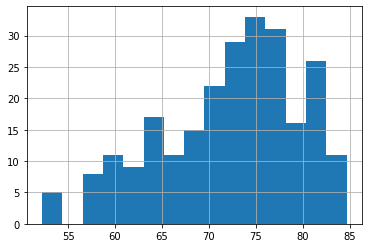

In [11]:
df['LifeExpextancy'].hist(bins=15) #The data distribution is negatively skewed

In [12]:
df.corr(method='pearson') 
#Correlation between each continuous variables 
#-1 and 1 for extreme correlation and 0 for no correlation
#DevelopedOrNot is not considered continuous variable so it is not taken in account

,Alcohol,GovernmentExpPercent,GDPPerCapita,GovernmentExpOnHealthOfGovernmentTotal,HealthPerCapita,InfantDeathPer1000,BMI1,DevelopedOrNot,LifeExpextancy
Alcohol,1.000000,0.173104,0.430378,0.414817,0.440172,-0.392574,0.114275,0.318487,0.362787
GovernmentExpPercent,0.173104,1.000000,0.203054,0.229585,0.234436,-0.284887,0.308742,0.165231,0.313423
GDPPerCapita,0.430378,0.203054,1.000000,0.452228,0.825805,-0.510950,0.225771,0.820557,0.668403
GovernmentExpOnHealthOfGovernmentTotal,0.414817,0.229585,0.452228,1.000000,0.683759,-0.526491,0.302329,0.476997,0.581821
HealthPerCapita,0.440172,0.234436,0.825805,0.683759,1.000000,-0.485064,0.199718,0.829248,0.590067
InfantDeathPer1000,-0.392574,-0.284887,-0.510950,-0.526491,-0.485064,1.000000,-0.539869,-0.437319,-0.938127
BMI1,0.114275,0.308742,0.225771,0.302329,0.199718,-0.539869,1.000000,0.121022,0.508661
DevelopedOrNot,0.318487,0.165231,0.820557,0.476997,0.829248,-0.437319,0.121022,1.000000,0.548239
LifeExpextancy,0.362787,0.313423,0.668403,0.581821,0.590067,-0.938127,0.508661,0.548239,1.000000


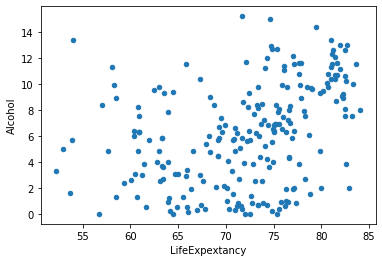

In [13]:
df.plot(y='Alcohol', x='LifeExpextancy', kind='scatter')
#There is a low correlation between alcohol and life excpectancy

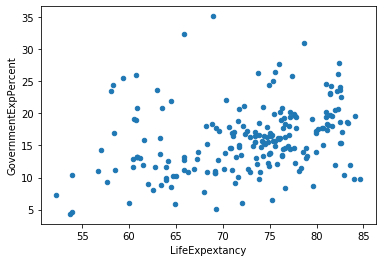

In [14]:
df.plot(y='GovernmentExpPercent', x='LifeExpextancy', kind='scatter')
#There is a low correlation between government expenditure percentage and life excpectancy

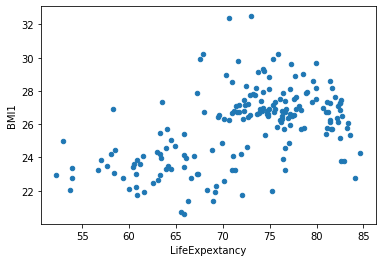

In [15]:
df.plot(y='BMI1', x='LifeExpextancy', kind='scatter')
#There is a moderate correlation between BMI and life excpectancy

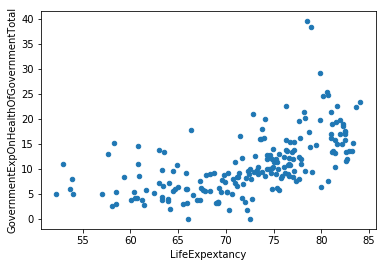

In [16]:
df.plot(y='GovernmentExpOnHealthOfGovernmentTotal', x='LifeExpextancy', kind='scatter')
#There is a moderate correlation between government expenditure on healthcare of government total and life excpectancy

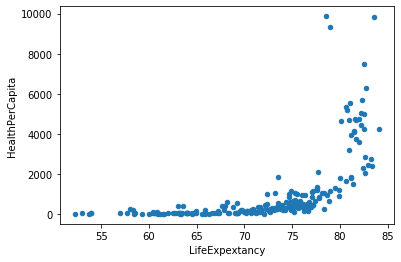

In [17]:
df.plot(y='HealthPerCapita', x='LifeExpextancy', kind='scatter')
#There is a moderate correlation between healthcare per capita and life excpectancy

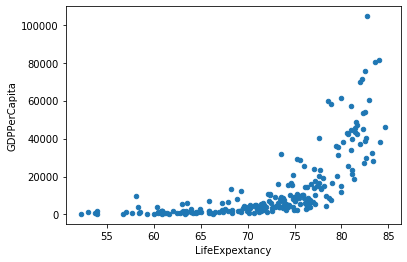

In [18]:
df.plot(y='GDPPerCapita', x='LifeExpextancy', kind='scatter')
#There is a moderate correlation between GDP per capita and life excpectancy

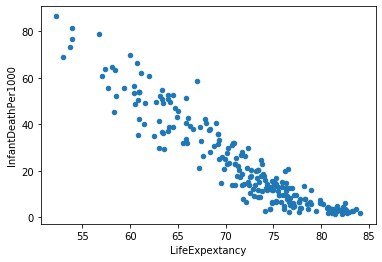

In [19]:
df.plot(y='InfantDeathPer1000', x='LifeExpextancy', kind='scatter')
#There is a high correlation between infant deaths per 1000 and life excpectancy

In [20]:
df.apply(lambda x: sum(x.isnull()),axis=0) #amount of missing values for each column, let's perform data munging.

Country Code                               0
Alcohol                                   25
GovernmentExpPercent                      50
GDPPerCapita                              12
GovernmentExpOnHealthOfGovernmentTotal    50
HealthPerCapita                           27
InfantDeathPer1000                        19
BMI1                                      62
DevelopedOrNot                             0
LifeExpextancy                            14
dtype: int64

In [21]:
grouped = df.groupby(['DevelopedOrNot']) #Split dataframe by developement status

In [22]:
transformed = grouped.transform(lambda x: x.fillna(x.median())) #Fill NAN:s with medians of each column based on developement status

In [23]:
transformed.describe() #Counts are matched, so all the empty values are filled

,Alcohol,GovernmentExpPercent,GDPPerCapita,GovernmentExpOnHealthOfGovernmentTotal,HealthPerCapita,InfantDeathPer1000,BMI1,LifeExpextancy
count,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000
mean,6.248291,16.187557,14030.915496,10.768776,1082.805957,22.095668,26.149607,72.482847
std,3.759888,5.733297,20240.957619,5.664071,1755.041005,19.190904,2.115619,7.298838
min,0.000000,4.325225,293.009062,0.000000,16.360435,1.500000,20.615073,52.240000
25%,3.071467,13.171709,2173.018137,7.589699,105.435638,6.225000,24.996008,68.018372
50%,6.063612,15.033628,5663.518388,9.034464,305.818244,15.750000,26.449700,73.465746
75%,9.419645,18.493225,16013.228482,13.562307,1023.665984,32.650000,26.954615,77.645616
max,15.200000,58.079737,166726.051926,39.456484,9869.742382,86.500000,34.107793,84.680488


In [24]:
transformed.insert(0, "Country Code", df['Country Code'])
transformed.insert(8, "DevelopedOrNot", df['DevelopedOrNot']) 
#Return the deleted columns

In [25]:
transformed.head(300)

,Country Code,Alcohol,GovernmentExpPercent,GDPPerCapita,GovernmentExpOnHealthOfGovernmentTotal,HealthPerCapita,InfantDeathPer1000,BMI1,DevelopedOrNot,LifeExpextancy
0,ABW,9.900000,27.720314,25630.266492,16.113647,4133.321552,3.200000,26.799532,1,76.010000
1,AFG,0.200000,12.571428,556.302139,2.014406,57.248760,49.500000,23.458295,0,64.130000
2,AGO,6.400000,12.935822,4095.812942,5.432697,95.220799,53.400000,23.406520,0,60.379000
3,ALB,7.500000,11.462782,4532.889198,9.508133,271.543043,8.000000,26.840991,0,78.333000
4,AND,11.300000,18.493225,39134.393371,14.017556,3834.730581,2.800000,26.875028,1,81.560976
5,ARB,0.617289,18.771998,6285.215228,9.034464,339.580123,27.006700,26.449700,0,71.622526
6,ARE,3.800000,12.317732,40325.382001,7.890501,1323.116803,6.600000,28.913083,1,77.647000
7,ARG,9.800000,17.666093,14591.863381,13.562027,955.200949,9.300000,27.908135,0,76.372000
8,ARM,5.500000,12.318552,3914.501268,6.053547,358.841748,11.600000,26.469201,0,74.797000
9,ASM,5.718000,15.033628,11398.777418,9.034464,240.860853,20.736149,34.107793,0,71.910000


In [26]:
check_transformed = transformed.groupby(['DevelopedOrNot'])

In [27]:
check_transformed.describe() #Compare transformed dataframe's medians to the original medians

Alcohol                                                   \
                 count      mean       std  min  25%    50%   75%   max   
DevelopedOrNot                                                            
0                209.0  5.574848  3.578558  0.0  2.6  5.718   7.9  15.2   
1                 49.0  9.120730  3.130496  0.0  8.9  9.900  10.7  13.4   

               GovernmentExpPercent                                            \
                              count       mean       std       min        25%   
DevelopedOrNot                                                                  
0                             209.0  15.656629  5.849581  4.325225  13.054485   
1                              49.0  18.452125  4.610471  8.633269  15.334445   

                                                GDPPerCapita                \
                      50%        75%        max        count          mean   
DevelopedOrNot                                                               
0               15.033628  17.187087  58.079737        209.0   5984.143966   
1               18.493225  20.716968  27.720314         49.0  48352.859369   

                                                                        \
                         std           min           25%           50%   
DevelopedOrNot                                                           
0                5459.672147    293.009062   1702.571349   4104.630983   
1               24081.995699  25630.266492  33873.285004  42350.056315   

                                             \
                         75%            max   
DevelopedOrNot                                
0                8663.273890   23715.482747   
1               56334.213992  166726.051926   

               GovernmentExpOnHealthOfGovernmentTotal                       \
                                                count       mean       std   
DevelopedOrNot                                                               
0                                               209.0   9.367206  4.385821   
1                                                49.0  16.746904  6.586453   

                                                                      \
                     min        25%        50%        75%        max   
DevelopedOrNot                                                         
0               0.000000   6.537679   9.034464  11.042594  29.187653   
1               5.685735  13.562400  16.113647  18.877281  39.456484   

               HealthPerCapita                                        \
                         count         mean          std         min   
DevelopedOrNot                                                         
0                        209.0   360.328384   385.739662   16.360435   
1                         49.0  4164.393968  1969.816272  630.629359   

                                                                    \
                        25%          50%          75%          max   
DevelopedOrNot                                                       
0                 77.673682   240.860853   468.647281  2092.609179   
1               2939.844964  4133.321552  4742.030274  9869.742382   

               InfantDeathPer1000                                              \
                            count       mean        std  min   25%        50%   
DevelopedOrNot                                                                  
0                           209.0  26.410604  18.864364  1.8  12.2  20.736149   
1                            49.0   3.691148   1.720437  1.5   2.8   3.200000   

                                  BMI1                                  \
                      75%   max  count       mean       std        min   
DevelopedOrNot                                                           
0               38.000000  86.5  209.0  26.019262  2.238605  20.615073   
1                4.173586   9.6   49.0  26.705572  1.363470  22.75274

In [28]:
grouped.describe() #The medians are a like, so the filling of empty values worked like excpected

Alcohol                                                    \
                 count      mean       std  min    25%    50%        75%   
DevelopedOrNot                                                             
0                195.0  5.564571  3.705219  0.0  2.500  5.718   8.177832   
1                 38.0  8.895152  3.532806  0.0  8.025  9.900  11.266915   

                     GovernmentExpPercent                                 \
                 max                count       mean       std       min   
DevelopedOrNot                                                             
0               15.2                167.0  15.813312  6.538514  4.325225   
1               13.4                 41.0  18.444105  5.050478  8.633269   

                                                           GDPPerCapita  \
                      25%        50%        75%        max        count   
DevelopedOrNot                                                            
0               11.687614  15.033628  18.089707  58.079737        197.0   
1               15.107368  18.493225  22.973589  27.720314         49.0   

                                                                        \
                        mean           std           min           25%   
DevelopedOrNot                                                           
0                6098.632066   5603.886743    293.009062   1602.403507   
1               48352.859369  24081.995699  25630.266492  33873.285004   

                                                           \
                         50%           75%            max   
DevelopedOrNot                                              
0                4104.630983   8944.752137   23715.482747   
1               42350.056315  56334.213992  166726.051926   

               GovernmentExpOnHealthOfGovernmentTotal                       \
                                                count       mean       std   
DevelopedOrNot                                                               
0                                               168.0   9.448410  4.891224   
1                                                40.0  16.889387  7.299253   

                                                                      \
                     min        25%        50%        75%        max   
DevelopedOrNot                                                         
0               0.000000   5.650103   9.034464  12.078768  29.187653   
1               5.685735  13.368852  16.113647  19.395596  39.456484   

               HealthPerCapita                                        \
                         count         mean          std         min   
DevelopedOrNot                                                         
0                        191.0   371.587105   401.761007   16.360435   
1                         40.0  4171.385262  2185.252496  630.629359   

                                                                    \
                        25%          50%          75%          max   
DevelopedOrNot                                                       
0                 69.251585   240.860853   492.090989  2092.609179   
1               2669.628013  4133.321552  5017.670166  9869.742382   

               InfantDeathPer1000                                       \
                            count       mean        std  min       25%   
DevelopedOrNot                                                           
0                           199.0  26.695752  19.290651  1.8  11.61007   
1                            40.0   3.801656   1.890705  1.5   2.67500   

                                         BMI1                                  \
                      50%    75%   max  count       mean       std        min   
DevelopedOrNot                                                                  
0               20.736149  38.95  86.5  162.0  25.894381  2.530714  20.615073   
1                3.200000   4.50   9.6   

In [29]:
transformed.isnull().any() #Check if the are are any empty values

Country Code                              False
Alcohol                                   False
GovernmentExpPercent                      False
GDPPerCapita                              False
GovernmentExpOnHealthOfGovernmentTotal    False
HealthPerCapita                           False
InfantDeathPer1000                        False
BMI1                                      False
DevelopedOrNot                            False
LifeExpextancy                            False
dtype: bool

In [30]:
print(transformed['LifeExpextancy'].skew())
print(transformed['LifeExpextancy'].kurtosis())

-0.5786764366164573
-0.3135828240212346


In [31]:
print(transformed['InfantDeathPer1000'].skew())
print(transformed['InfantDeathPer1000'].kurtosis())

1.0725015572833632
0.43359218422059476


In [32]:
print(transformed['GDPPerCapita'].skew())
print(transformed['GDPPerCapita'].kurtosis())

3.0634128719293776
14.341737517275245


In [33]:
print(transformed['HealthPerCapita'].skew())
print(transformed['HealthPerCapita'].kurtosis())

2.4810538320161175
6.776529124250503


In [34]:
print(transformed['BMI1'].skew())
print(transformed['BMI1'].kurtosis())

0.017226354527664824
1.1121865366188128


In [35]:
print(transformed['Alcohol'].skew())
print(transformed['Alcohol'].kurtosis())

0.0634359301393961
-0.9158873187370657


In [36]:
print(transformed['GovernmentExpOnHealthOfGovernmentTotal'].skew())
print(transformed['GovernmentExpOnHealthOfGovernmentTotal'].kurtosis())

1.3958697062096377
4.050260221381467


In [37]:
print(transformed['GovernmentExpPercent'].skew())
print(transformed['GovernmentExpPercent'].kurtosis())

2.2561076826218565
12.548749237138848


In [38]:
transformed['GDPPerCapita'] = np.log(transformed['GDPPerCapita']) 
#To normalize the data distribution and to eliminate the skewness

In [39]:
transformed['LifeExpextancy'] = np.square(np.square(transformed['LifeExpextancy']))

In [40]:
transformed['InfantDeathPer1000'] = np.log(transformed['InfantDeathPer1000'])

In [41]:
transformed['GovernmentExpPercent'] = np.sqrt(transformed['GovernmentExpPercent'])

In [42]:
transformed['GovernmentExpOnHealthOfGovernmentTotal'] = np.sqrt(transformed['GovernmentExpOnHealthOfGovernmentTotal']) 

In [43]:
transformed['HealthPerCapita'] = np.log(transformed['HealthPerCapita'])
#You can now run the skewness and kurtosis cells again to check the new values

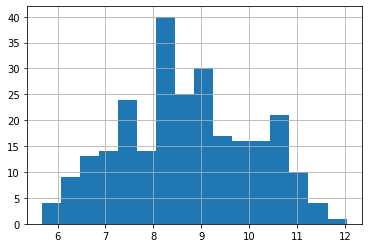

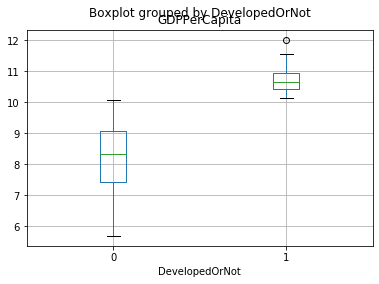

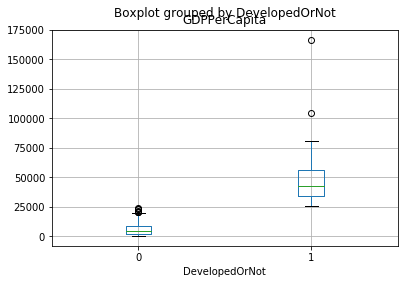

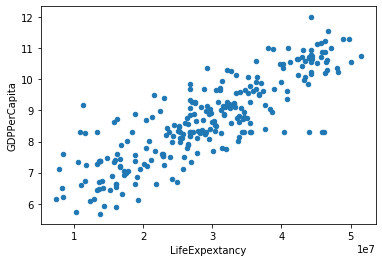

In [44]:
transformed['GDPPerCapita'].hist(bins=16)
transformed.boxplot(column='GDPPerCapita', by = 'DevelopedOrNot')
df.boxplot(column='GDPPerCapita', by = 'DevelopedOrNot')
transformed.plot(y='GDPPerCapita', x='LifeExpextancy', kind='scatter')
#0 for developing countries and 1 for developed countries
#The circles are outliers

In [45]:
transformed['GDPPerCapita'].value_counts().head(5) #Mode

8.319871     13
7.532234      2
8.973817      1
5.929242      1
10.062608     1
Name: GDPPerCapita, dtype: int64

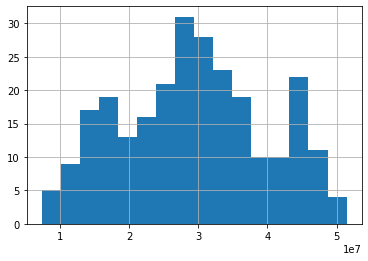

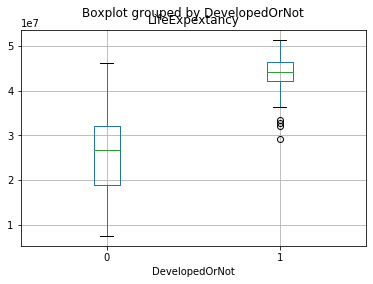

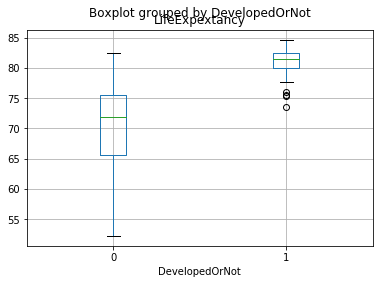

In [46]:
transformed['LifeExpextancy'].hist(bins=16)
transformed.boxplot(column='LifeExpextancy', by = 'DevelopedOrNot')
df.boxplot(column='LifeExpextancy', by = 'DevelopedOrNot')

In [47]:
transformed['LifeExpextancy'].value_counts().head(5) #Mode

2.673974e+07    9
4.425167e+07    7
2.289307e+07    2
3.319918e+07    1
3.587622e+07    1
Name: LifeExpextancy, dtype: int64

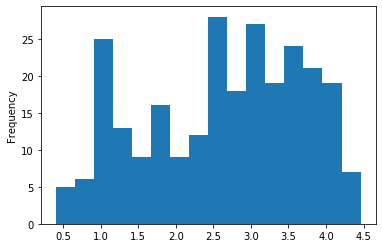

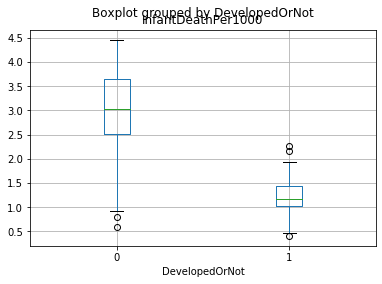

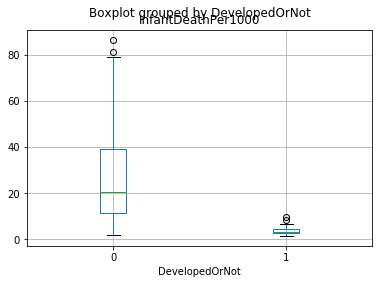

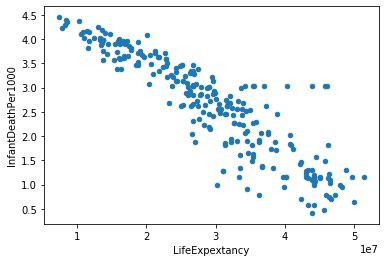

In [48]:
transformed['InfantDeathPer1000'].plot.hist(bins=16)
transformed.boxplot(column='InfantDeathPer1000', by = 'DevelopedOrNot')
df.boxplot(column='InfantDeathPer1000', by = 'DevelopedOrNot')
transformed.plot(y='InfantDeathPer1000', x='LifeExpextancy', kind='scatter')

In [49]:
transformed['InfantDeathPer1000'].value_counts().head(5) #Mode

1.163151    11
3.031878    11
1.308333     3
1.280934     3
1.887070     3
Name: InfantDeathPer1000, dtype: int64

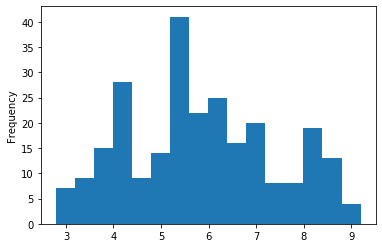

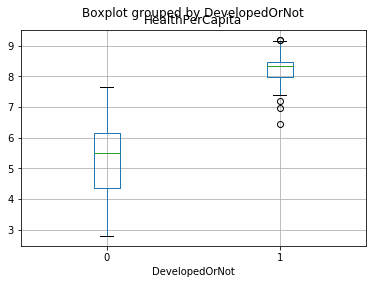

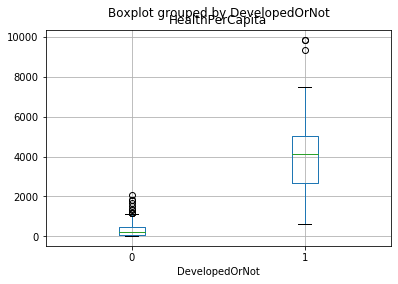

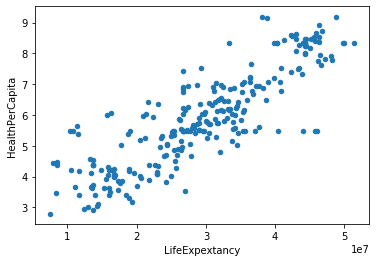

In [50]:
transformed['HealthPerCapita'].plot.hist(bins=16)
transformed.boxplot(column='HealthPerCapita', by = 'DevelopedOrNot')
df.boxplot(column='HealthPerCapita', by = 'DevelopedOrNot')
transformed.plot(y='HealthPerCapita', x='LifeExpextancy', kind='scatter')

In [51]:
transformed['HealthPerCapita'].value_counts().head(5) #Mode

5.484219    19
8.326837     9
4.068981     2
4.361495     2
5.501400     2
Name: HealthPerCapita, dtype: int64

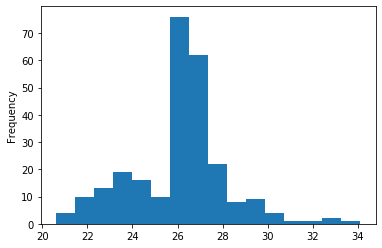

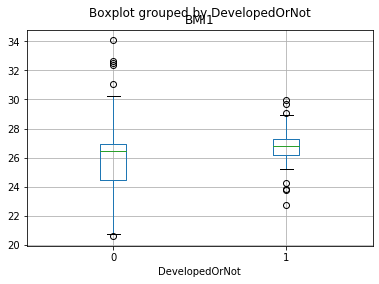

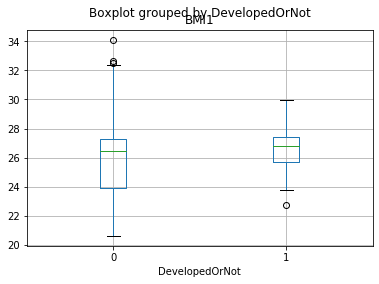

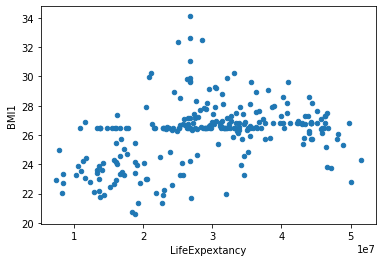

In [52]:
transformed['BMI1'].plot.hist(bins=16)
transformed.boxplot(column='BMI1', by = 'DevelopedOrNot')
df.boxplot(column='BMI1', by = 'DevelopedOrNot')
transformed.plot(y='BMI1', x='LifeExpextancy', kind='scatter')

In [53]:
transformed['BMI1'].value_counts().head(5) #Mode

26.449700    47
26.799532    15
25.703744     1
23.506183     1
21.361172     1
Name: BMI1, dtype: int64

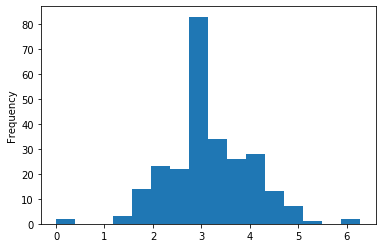

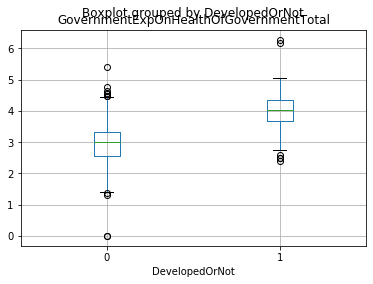

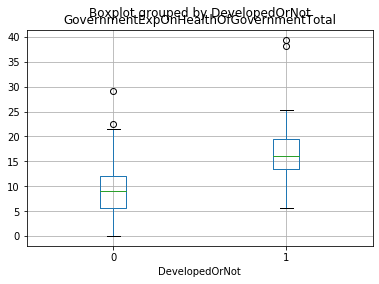

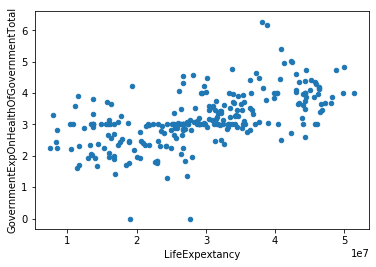

In [54]:
transformed['GovernmentExpOnHealthOfGovernmentTotal'].plot.hist(bins=16)
transformed.boxplot(column='GovernmentExpOnHealthOfGovernmentTotal', by = 'DevelopedOrNot')
df.boxplot(column='GovernmentExpOnHealthOfGovernmentTotal', by = 'DevelopedOrNot')
transformed.plot(y='GovernmentExpOnHealthOfGovernmentTotal', x='LifeExpextancy', kind='scatter')

In [55]:
transformed['GovernmentExpOnHealthOfGovernmentTotal'].value_counts().head(5) #Mode

3.005739    41
4.014181     9
1.828813     2
0.000000     2
3.667806     1
Name: GovernmentExpOnHealthOfGovernmentTotal, dtype: int64

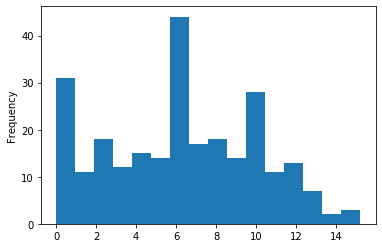

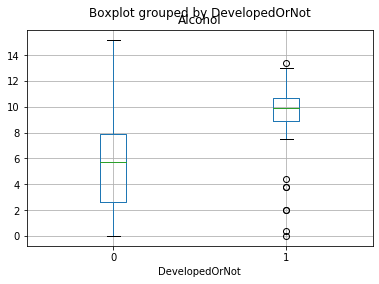

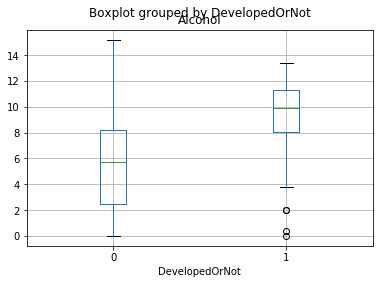

In [56]:
transformed['Alcohol'].plot.hist(bins=16)
transformed.boxplot(column='Alcohol', by = 'DevelopedOrNot')
df.boxplot(column='Alcohol', by = 'DevelopedOrNot')

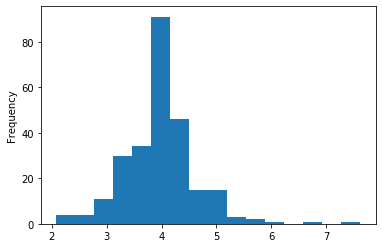

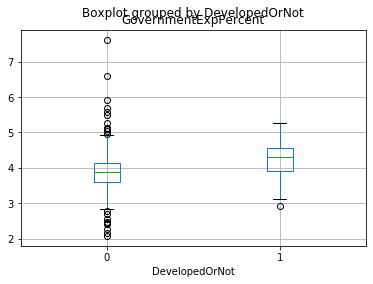

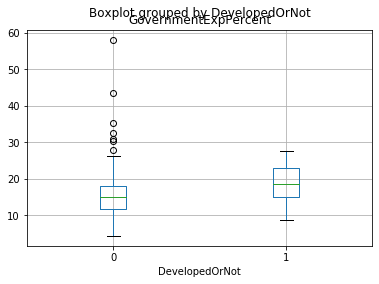

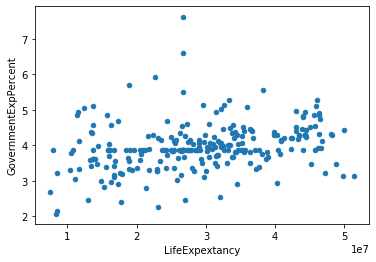

In [57]:
transformed['GovernmentExpPercent'].plot.hist(bins=16)
transformed.boxplot(column='GovernmentExpPercent', by = 'DevelopedOrNot')
df.boxplot(column='GovernmentExpPercent', by = 'DevelopedOrNot')
transformed.plot(y='GovernmentExpPercent', x='LifeExpextancy', kind='scatter')

In [58]:
transformed.describe()

,Alcohol,GovernmentExpPercent,GDPPerCapita,GovernmentExpOnHealthOfGovernmentTotal,HealthPerCapita,InfantDeathPer1000,BMI1,DevelopedOrNot,LifeExpextancy
count,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,2.580000e+02
mean,6.248291,3.968081,8.704437,3.167631,5.868285,2.643774,26.149607,0.189922,2.921786e+07
std,3.759888,0.666042,1.361434,0.858925,1.552086,1.037308,2.115619,0.393002,1.059865e+07
min,0.000000,2.079717,5.680204,0.000000,2.794866,0.405465,20.615073,0.000000,7.447537e+06
25%,3.071467,3.629283,7.683865,2.754931,4.658088,1.828549,24.996008,0.000000,2.140482e+07
50%,6.063612,3.877322,8.641796,3.005739,5.722965,2.756795,26.449700,0.000000,2.913003e+07
75%,9.419645,4.300375,9.681147,3.682704,6.931136,3.485813,26.954615,0.000000,3.634693e+07
max,15.200000,7.621006,12.024107,6.281440,9.197229,4.460144,34.107793,1.000000,5.142016e+07


In [59]:
transformed.head(300)

,Country Code,Alcohol,GovernmentExpPercent,GDPPerCapita,GovernmentExpOnHealthOfGovernmentTotal,HealthPerCapita,InfantDeathPer1000,BMI1,DevelopedOrNot,LifeExpextancy
0,ABW,9.900000,5.265008,10.151529,4.014181,8.326837,1.163151,26.799532,1,3.337974e+07
1,AFG,0.200000,3.545621,6.321312,1.419298,4.047406,3.901973,23.458295,0,1.691395e+07
2,AGO,6.400000,3.596640,8.317720,2.330815,4.556198,3.977811,23.406520,0,1.329057e+07
3,ALB,7.500000,3.385673,8.419115,3.083526,5.604121,2.079442,26.840991,0,3.765122e+07
4,AND,11.300000,4.300375,10.574757,3.744003,8.251854,1.029619,26.875028,1,4.425167e+07
5,ARB,0.617289,4.332666,8.745955,3.005739,5.827710,3.296085,26.449700,0,2.631471e+07
6,ARE,3.800000,3.509663,10.604736,2.809004,7.187745,1.887070,28.913083,1,3.634952e+07
7,ARG,9.800000,4.203105,9.588219,3.682666,6.861922,2.230014,27.908135,0,3.402018e+07
8,ARM,5.500000,3.509779,8.272443,2.460396,5.882881,2.451005,26.469201,0,3.129945e+07
9,ASM,5.718000,3.877322,9.341261,3.005739,5.484219,3.031878,34.107793,0,2.673974e+07


In [60]:
X = transformed['InfantDeathPer1000'].values.reshape(-1, 1)
Y = transformed['LifeExpextancy'].values.reshape(-1, 1)
#Let's create training and testing data for univariate prediction

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [62]:
regressor = LinearRegression()  
regressor.fit(X_train, Y_train)
print(regressor.intercept_)
print(regressor.coef_) #This is how many units of life excpectancy change when one unit of InfantDeathPer1000 changes (mean change)

[53536177.23475647]
[[-9217357.67021847]]


In [63]:
Y_pred = regressor.predict(X_test)

In [64]:
predframe = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': Y_pred.flatten()})
predframe

,Actual,Predicted
0,4.092110e+07,3.686853e+07
1,3.042170e+07,3.003703e+07
2,1.338769e+07,1.772048e+07
3,2.569922e+07,2.694594e+07
4,3.178169e+07,2.874971e+07
5,4.622104e+07,3.686853e+07
6,3.129945e+07,3.094439e+07
7,3.390985e+07,2.876133e+07
8,3.386721e+07,3.102419e+07
9,2.645382e+07,2.934367e+07


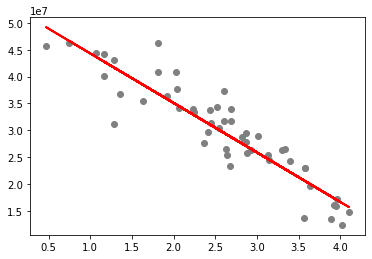

In [65]:
plt.scatter(X_test, Y_test, color='gray')
plt.plot(X_test, Y_pred, color='red', linewidth=2)
plt.show()
#Gray dots are the actual values and red line is the prediction

In [66]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 2695038.9336718027
Mean Squared Error: 12759351460019.436
Root Mean Squared Error: 3572023.4405753044


In [67]:
regressor.score(X_test, Y_test) #Model accuracy

0.8387680423291485

In [68]:
X1 = transformed[['GDPPerCapita', 'InfantDeathPer1000']]
Y1 = transformed['LifeExpextancy']
#Multivariate prediction. I chose these two predictors because they have the highest correlation with life excpectansy

In [69]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=0)

In [70]:
regressor1 = LinearRegression()  
regressor1.fit(X1_train, Y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
list(zip(['GDPPerCapita', 'InfantDeathPer1000'], regressor1.coef_))

[('GDPPerCapita', 2062630.892494419),
 ('InfantDeathPer1000', -6920835.2141301315)]

In [72]:
Y1_pred = regressor1.predict(X1_test)

In [73]:
predframe1 = pd.DataFrame({'Actual': Y1_test, 'Predicted': Y1_pred})
predframe1.head(300)

,Actual,Predicted
194,4.092110e+07,3.968634e+07
111,3.042170e+07,2.941329e+07
225,1.338769e+07,1.583181e+07
116,2.569922e+07,2.419614e+07
122,3.178169e+07,2.962504e+07
153,4.622104e+07,3.801464e+07
8,3.129945e+07,2.956492e+07
236,3.390985e+07,2.769156e+07
180,3.386721e+07,3.073359e+07
144,2.645382e+07,2.761551e+07


In [74]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y1_test, Y1_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y1_test, Y1_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y1_test, Y1_pred)))

Mean Absolute Error: 2406628.118358861
Mean Squared Error: 9979101897951.434
Root Mean Squared Error: 3158971.6519702156


In [75]:
regressor1.score(X1_test, Y1_test) #It seems that the accuracy is higher with two predictors

0.8739003201028552

In [76]:
kf = KFold(shuffle=True, n_splits=6)
regressor2 = LinearRegression()
score = cross_val_score(regressor2, X1, Y1, cv=kf)
print(score)
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
#Cross-validated accuracy score with variance
#You can run this cell multiple times to see that there are different values for variance each time the set is shuffled

[0.86551671 0.70046366 0.79574017 0.78087528 0.90771043 0.83187805]
Accuracy: 0.81 (+/- 0.13)


In [77]:
model = LinearRegression()  
model.fit(X1, Y1)
#This is the final model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [78]:
df1 = pd.read_csv("test_data2015.csv") #Test data to validate the model with new data gathered from World Bank (2015)

In [79]:
df1.head(20)

,CountryCode,InfantDeathPer1000,GDPPerCapita
0,FIN,2,42811.2
1,ETH,44,640.5
2,UGA,39,709.0
3,AUS,3,56755.7
4,BLR,3,5949.1
5,BEL,3,40991.8
6,BRA,14,8814.0
7,CAN,5,43495.1
8,EGY,20,3599.0
9,FRA,3,36613.4


In [80]:
df1['GDPPerCapita'] = np.log(df1['GDPPerCapita']) 
df1['InfantDeathPer1000'] = np.log(df1['InfantDeathPer1000'])
#It is required to transform the data so it can fit our model

In [81]:
X3 = df1[['GDPPerCapita', 'InfantDeathPer1000']]
#These are the predictors

In [82]:
Y3_pred = model.predict(X3)
print(Y3_pred)

[46637743.37344339 16614750.94712387 17648742.73852786 44537874.83649473
 39561242.73584104 43819938.63894313 30087214.79158093 40521432.22905611
 25716505.75184248 43570705.58360028 20178734.07298581 46163073.51908956
 39470290.92128401 44034350.88429558 23990972.1328169  43420674.45478483
 32184722.12449654 39886468.7948658  25603179.89447733]


In [83]:
Y3_pred = np.sqrt(np.sqrt(Y3_pred)) #Prediction must be transformed so it is readable

In [84]:
Y3_actual = [81.48, 65.04, 59.58, 82.40, 73.62, 80.99, 75.28, 82.13, 71.30, 82.27, 68.30, 83.79, 74.48, 81.51, 68.95, 82.90, 75.50, 78.69, 76.05]
#These are the actual 2015 life excpectansies gathered from World Bank.

In [85]:
predframe3 = pd.DataFrame({'CountryCode': df1['CountryCode'], 'Actual': Y3_actual, 'Predicted': Y3_pred})
print(predframe3)

   CountryCode  Actual  Predicted
0          FIN   81.48  82.638872
1          ETH   65.04  63.844495
2          UGA   59.58  64.815435
3          AUS   82.40  81.692535
4          BLR   73.62  79.308088
5          BEL   80.99  81.361312
6          BRA   75.28  74.062010
7          CAN   82.13  79.784990
8          EGY   71.30  71.211968
9          FRA   82.27  81.245375
10         IND   68.30  67.022941
11         JPN   83.79  82.427794
12         LVA   74.48  79.262466
13         NLD   81.51  81.460655
14         PHL   68.95  69.986127
15         CHE   82.90  81.175345
16         TUR   75.50  75.320369
17         USA   78.69  79.470583
18         VNM   76.05  71.133385


In [86]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y3_actual, Y3_pred)))

Root Mean Squared Error: 2.579662157577434


In [87]:
Y3_acc = 1 - (2.579662157577434 / np.mean(Y3_actual))
print(Y3_acc)
#Accuracy on the test dataset

0.9660631873804085
